# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Insights

### Analysis

* On the overall, most cities analysed are from the northern hemisphere. That is, 382 of the 580 random cities selected when the code was last executed.
*  With respects to the scatter plots, there is a negative non-linear correlation observed in the relationship between city's latitude and temperature, while there is a positive correlation between the city's latitude and humidity. This is understandable because most cities selected are from the northern hemisphere, and the temperature is expected to drop as we move towards the pole, while the humidity increases. However, there is no correlation observed in the relationships between city's latitude and cloudiness, and between city's latitude and the wind speed.
*  With respect to linear regression, cities in both northern and southern hemispheres have strong correlation between max temperature and latitude, although the cities in the northern hemisphere have an inverse correlation. This is understandable because generally around the world, it gets warmer towards the equator and cooler towards the poles.

In [1]:
# Import all dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [47]:
# Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Print Cities List
print(cities)

596
['atar', 'albany', 'rungata', 'tadine', 'ugoofaaru', 'luderitz', 'jamestown', 'nikolskoye', 'cabra', 'kaitangata', 'lata', 'sabang', 'yellowknife', 'torbay', 'batagay-alyta', 'kalabagh', 'chagda', 'bluff', 'tuktoyaktuk', 'nizhniy kuranakh', 'barrow', 'moree', 'east london', 'buarcos', 'tumannyy', 'port alfred', 'bethel', 'qaanaaq', 'severo-kurilsk', 'rikitea', 'kadhan', 'ushuaia', 'ngunguru', 'bredasdorp', 'mansoa', 'upernavik', 'mataura', 'mahebourg', 'hilo', 'taoudenni', 'airai', 'cape town', 'hermanus', 'erenhot', 'kindu', 'atuona', 'saint george', 'mitsamiouli', 'hofn', 'pevek', 'yar-sale', 'new norfolk', 'hihifo', 'kokomo', 'cockburn town', 'alexandria', 'marsaxlokk', 'bathsheba', 'punta arenas', 'barentsburg', 'sao domingos', 'avarua', 'ciudad ojeda', 'georgetown', 'mosonmagyarovar', 'kapaa', 'dunedin', 'fayaoue', 'kiknur', 'hobart', 'rayon', 'taolanaro', 'baykalsk', 'nome', 'lebedyn', 'butaritari', 'los llanos de aridane', 'iqaluit', 'jumla', 'inyonga', 'mar del plata', 'hit

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Components of API 
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Initializze a counter to store the city number
counter = 1

# Perform a weather check 
# on each of the cities using a series of successive API calls
# Then, extract the weather components (latitude, temperature, wind speed..)
# needed for our analyses and chats
for city in cities:
    try:
        query_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url).json()
        city_humidity = weather_response["main"]["humidity"]
        city_temp = weather_response["main"]["temp"]
        city_Maxtemp = weather_response["main"]["temp_max"]
        city_lat = weather_response["coord"]["lat"] 
        city_wind = weather_response["wind"]["speed"]
        city_cloud = weather_response["clouds"]["all"]
        city_country = weather_response["sys"]["country"]
        city_datetime = weather_response["dt"]
        city_lon = weather_response["coord"]["lon"]
        # Print a log of each city with the city number and city name
        print(f"processing record number {counter} | {city}")
        counter += 1
        city_data.append ({"City":city,
                           "Country": city_country,
                           "DateTime":city_datetime,
                           "Humidity": city_humidity,
                           "Temperature": city_temp,
                           "Max. Temp.":  city_Maxtemp,
                           "Latitude": city_lat,
                           "WindSpeed": city_wind,
                           "Cloudiness": city_cloud,
                           "Longitude": city_lon
                     })        
    except:
        # Print city does not exist, if the city details are missing
        print("City does not exist")
        pass

processing record number 1 | albany
processing record number 2 | lipin bor
processing record number 3 | hilo
processing record number 4 | marsh harbour
City does not exist
City does not exist
City does not exist
processing record number 5 | salalah
processing record number 6 | jining
processing record number 7 | vaini
processing record number 8 | bredasdorp
processing record number 9 | rio grande
processing record number 10 | rikitea
processing record number 11 | alice town
processing record number 12 | provideniya
processing record number 13 | parrita
processing record number 14 | yeppoon
processing record number 15 | angoche
processing record number 16 | playas
processing record number 17 | hamilton
processing record number 18 | butaritari
processing record number 19 | broome
processing record number 20 | ushuaia
processing record number 21 | lebu
processing record number 22 | bambanglipuro
processing record number 23 | chuy
processing record number 24 | gorontalo
processing record n

processing record number 199 | rossland
processing record number 200 | new iberia
processing record number 201 | soledade
processing record number 202 | ancud
processing record number 203 | alihe
processing record number 204 | klaksvik
processing record number 205 | hualmay
processing record number 206 | meadow lake
processing record number 207 | vila franca do campo
processing record number 208 | brainerd
processing record number 209 | marawi
processing record number 210 | ribeira grande
City does not exist
processing record number 211 | camana
processing record number 212 | san cristobal
processing record number 213 | chokurdakh
processing record number 214 | jamestown
processing record number 215 | maceio
processing record number 216 | haimen
processing record number 217 | east london
processing record number 218 | williston
processing record number 219 | chikwawa
processing record number 220 | tanout
processing record number 221 | mecca
processing record number 222 | srednekolymsk


processing record number 392 | gerede
processing record number 393 | teguise
processing record number 394 | abha
processing record number 395 | namibe
processing record number 396 | walvis bay
processing record number 397 | kirakira
processing record number 398 | saint-joseph
processing record number 399 | palana
processing record number 400 | shahrud
processing record number 401 | linqiong
processing record number 402 | sangar
processing record number 403 | grootfontein
processing record number 404 | dakar
processing record number 405 | diffa
processing record number 406 | pangoa
processing record number 407 | bor
processing record number 408 | curvelo
processing record number 409 | emba
processing record number 410 | dosso
processing record number 411 | chalmette
processing record number 412 | smithers
processing record number 413 | griffith
City does not exist
processing record number 414 | sambava
processing record number 415 | belyy yar
processing record number 416 | kysyl-syr
pro

In [4]:
weather_response

{'coord': {'lon': 125.22, 'lat': 49.18},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -5.36,
  'feels_like': -12.71,
  'temp_min': -5.36,
  'temp_max': -5.36,
  'pressure': 1013,
  'humidity': 94,
  'sea_level': 1013,
  'grnd_level': 985},
 'visibility': 10000,
 'wind': {'speed': 6.6, 'deg': 341},
 'clouds': {'all': 100},
 'dt': 1604780893,
 'sys': {'country': 'CN', 'sunrise': 1604788681, 'sunset': 1604822866},
 'timezone': 28800,
 'id': 2035601,
 'name': 'Mergen',
 'cod': 200}

In [5]:
# Convert city_data to DataFrame
city_data = pd.DataFrame(city_data)
city_data

# Export the city data into a .csv 
city_data.to_csv(output_data_file, encoding="utf-8", index=False)
city_data

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,albany,US,1604780661,43,20.59,21.11,42.60,2.60,75,-73.97
1,lipin bor,RU,1604780767,84,6.78,6.78,60.26,7.39,97,37.98
2,hilo,US,1604780745,78,24.36,26.67,19.73,4.10,90,-155.09
3,marsh harbour,BS,1604780485,75,26.31,26.31,26.54,11.99,100,-77.06
4,salalah,OM,1604780550,69,24.00,24.00,17.02,1.00,0,54.09
...,...,...,...,...,...,...,...,...,...,...
575,gambela,ET,1604780892,81,23.69,23.69,8.25,1.20,75,34.58
576,comodoro rivadavia,AR,1604780679,48,19.00,19.00,-45.87,6.70,0,-67.50
577,fontem,CM,1604780892,92,19.85,19.85,5.47,0.78,100,9.88
578,puyang,CN,1604780892,17,16.67,16.67,29.46,1.04,4,119.89


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(city_data)

580

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check the city_data for cities with humidity <= 100
clean_city_data = city_data.loc[(
    city_data["Humidity"] <= 100)]
clean_city_data

# The cities with humidity below or equal to 100 
# are still the same cities in our original datasets

,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,albany,US,1604780661,43,20.59,21.11,42.60,2.60,75,-73.97
1,lipin bor,RU,1604780767,84,6.78,6.78,60.26,7.39,97,37.98
2,hilo,US,1604780745,78,24.36,26.67,19.73,4.10,90,-155.09
3,marsh harbour,BS,1604780485,75,26.31,26.31,26.54,11.99,100,-77.06
4,salalah,OM,1604780550,69,24.00,24.00,17.02,1.00,0,54.09
...,...,...,...,...,...,...,...,...,...,...
575,gambela,ET,1604780892,81,23.69,23.69,8.25,1.20,75,34.58
576,comodoro rivadavia,AR,1604780679,48,19.00,19.00,-45.87,6.70,0,-67.50
577,fontem,CM,1604780892,92,19.85,19.85,5.47,0.78,100,9.88
578,puyang,CN,1604780892,17,16.67,16.67,29.46,1.04,4,119.89


In [8]:
#  Get the indices of cities that have humidity over 100%.
reduced_city_data = city_data.loc[(
    city_data["Humidity"] > 100)]
reduced_city_data.index

# There is no city with humidity>100.
# So, this step and the next step are skipped

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

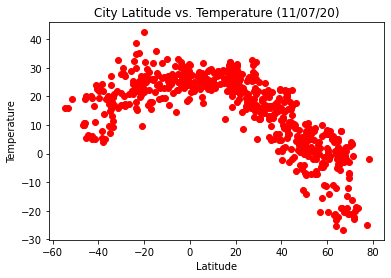

In [10]:
# Retrieve the latitude and temperature from city_data
latitude = city_data["Latitude"].tolist()
latitude
temperature = city_data["Temperature"].tolist()
temperature


# Plot the scatter diagram of latitude vs. temperature
plt.scatter(latitude, temperature, color = "red")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure1.png")    

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.temperature in order to show how much a city's temperature is affected by its latitude. 
* The scatter plots show that there is a negative non-linear correlation between latitude and temperature.

## Latitude vs. Humidity Plot

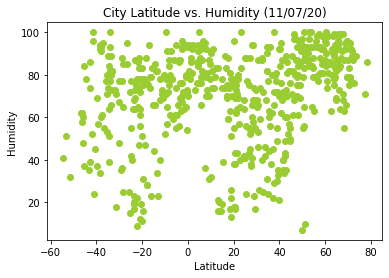

In [11]:
# Retrieve the humidity from city_data
humidity = city_data["Humidity"].tolist()
humidity

# Plot the scatter diagram of latitude vs. humidity
plt.scatter(latitude, humidity, color="yellowgreen")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure2.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.humidity in order to show how much a city's humidity is affected by its latitude. 
* The scatter plots show that there is a positive correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

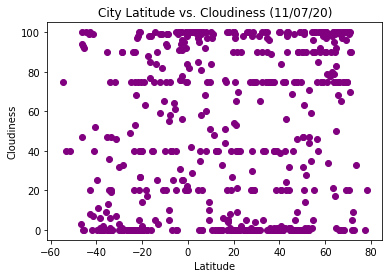

In [12]:
# Retrieve the cloudiness from city_data
cloudiness = city_data["Cloudiness"].tolist()
cloudiness

# Plot the scatter diagram of latitude vs. cloudiness
plt.scatter(latitude, cloudiness, color="purple")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure3.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.cloudiness in order to show how much a city's cloudiness is affected by its latitude. 
* The scatter plots show that there is a no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

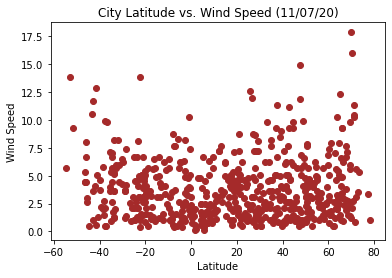

In [13]:
# Retrieve the wind speed from city_data
windspeed = city_data["WindSpeed"].tolist()
windspeed

# Plot the scatter diagram of latitude vs. wind speed
plt.scatter(latitude, windspeed, color="brown")

# Include the axes labels, plot title, and date of analysis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure4.png")

#### What the lines of code in the previous cell achieve
* The lines of codes in this cell generate the scatter plots of latitude VS.wind speed in order to show how much a city's wind speed is affected by its latitude. 
* The scatter plots show that there is no correlation between latitude and wind speed.

## Linear Regression

In [14]:
# Select data for Northern Hemisphere
North_city_data = city_data.loc[(
    city_data["Latitude"] >= 0)]
print(len(North_city_data))
North_city_data.head()

382


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
0,albany,US,1604780661,43,20.59,21.11,42.60,2.60,75,-73.97
1,lipin bor,RU,1604780767,84,6.78,6.78,60.26,7.39,97,37.98
2,hilo,US,1604780745,78,24.36,26.67,19.73,4.10,90,-155.09
3,marsh harbour,BS,1604780485,75,26.31,26.31,26.54,11.99,100,-77.06
4,salalah,OM,1604780550,69,24.00,24.00,17.02,1.00,0,54.09


In [15]:
# Select data for Southern Hemisphere
South_city_data = city_data.loc[(
    city_data["Latitude"] < 0)]
print(len(South_city_data))
South_city_data.head()

198


,City,Country,DateTime,Humidity,Temperature,Max. Temp.,Latitude,WindSpeed,Cloudiness,Longitude
6,vaini,TO,1604780769,74,26.00,26.00,-21.20,3.10,20,-175.20
7,bredasdorp,ZA,1604780769,51,17.00,17.00,-34.53,6.70,0,20.04
8,rio grande,BR,1604780663,73,22.00,22.00,-32.03,8.20,75,-52.10
9,rikitea,PF,1604780769,73,21.85,21.85,-23.12,8.16,53,-134.97
13,yeppoon,AU,1604780770,64,24.00,24.00,-23.13,4.60,90,150.73


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      26.518730
1      44.105295
2      19.695191
3      20.137003
4      22.971963
         ...    
574    22.800147
575    23.352412
577    28.065071
578    31.967742
579    59.004171
Name: Max. Temp., Length: 382, dtype: float64
y=-1.23x + 52.43
 Correlation =  -0.85


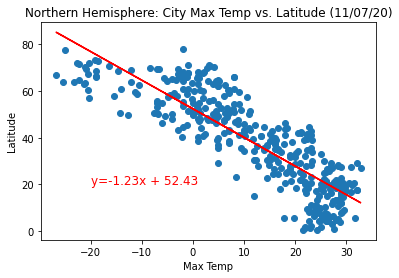

In [48]:
# Retrieve the Max Temp and Latitude for northern hemisphere
Northmax_temp = North_city_data.iloc[:,5]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
N_slope, N_int, N_r, N_p, N_std_err = linregress(Northmax_temp, North_lat)
N_fit = N_slope * Northmax_temp + N_int
print(N_fit)

# Print the regression equation
North_equation =  f"y={round(N_slope, 2)}x + {round(N_int,2)}"
print(North_equation)

# Compute and print the correlation 
print(f" Correlation =  {round((N_r),2)}")
# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
plt.plot(Northmax_temp, N_fit, color="red")
plt.annotate(North_equation,(-20,20), fontsize=12, color ="red")
plt.scatter(Northmax_temp, North_lat)

# Include the axes labels, plot title and date of analysis
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Northern Hemisphere: City Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure5.png")
plt.show() 
   
# After each pair of plots, explain what the linear regression is modeling
# such as any relationships you notice and any other analysis you may have.

#### What does the linear regression model? 
 
* The linear regression between max temperature and latitude of cities in the northern hemisphere is used to predict the latitudes of the cities given their max temperature. 
* There is a strong inverse relationship between max temperature and latitude. That is, the higher the max temperature the lower the latitude. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

6     -17.186573
7     -27.984098
8     -21.985473
9     -22.165432
13    -19.586023
         ...    
555   -15.746903
558   -24.996783
568   -27.528203
571   -14.787123
576   -25.584648
Name: Max. Temp., Length: 198, dtype: float64
y=1.2x + (-48.38)
 Correlation =  0.59


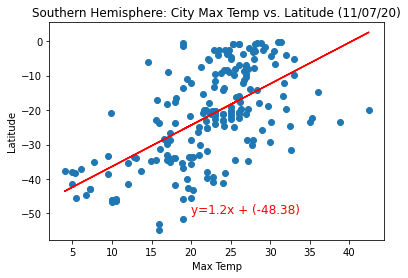

In [49]:
# Retrieve the Max Temp and latitude for southern hemisphere
Southmax_temp = South_city_data.iloc[:,5]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of Max Temp vs. Latitude
S_slope, S_int, S_r, S_p, S_std_err = linregress(Southmax_temp, South_lat)
S_fit = S_slope * Southmax_temp + S_int
print(S_fit)

# Print the regression equation
South_equation =  f"y={round(S_slope, 2)}x + ({round(S_int,2)})"
print(South_equation)

# Compute and print the correlation 
print(f" Correlation =  {round((S_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(Southmax_temp, S_fit, color="red")
plt.annotate(South_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(Southmax_temp, South_lat)
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.title("Southern Hemisphere: City Max Temp vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure6.png")
plt.show()

#### What does the linear regression model? 
 
* The linear regression between max temperature and latitude of cities in the southern hemisphere is used to predict the latitudes of the cities given their max temperature.  
* There is a moderate positive relationship between max temperature and latitude. That is, the higher the max temperature the higher the latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      30.543806
1      41.465397
2      39.867116
3      39.067975
4      37.469693
         ...    
574    38.801594
575    40.666256
577    43.596439
578    23.617919
579    44.129200
Name: Humidity, Length: 382, dtype: float64
y=0.27x + 19.09
 Correlation =  0.28


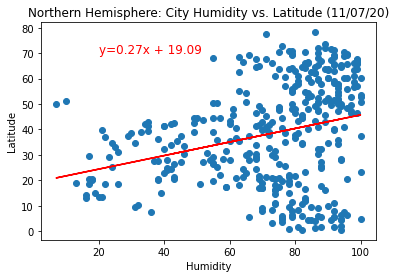

In [50]:
# Retrieve the humidity for northern hemisphere
North_city_data.head()
North_humidity = North_city_data.iloc[:,3]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
NHL_slope, NHL_int, NHL_r, NHL_p, NHL_std_err = linregress(North_humidity, North_lat)
NHL_fit = NHL_slope * North_humidity + NHL_int
print(NHL_fit)

# Print the regression equation
NorthHL_equation =  f"y={round(NHL_slope, 2)}x + {round(NHL_int,2)}"
print(NorthHL_equation)

# Compute and print the correlation 
print(f" Correlation =  {round((NHL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_humidity, NHL_fit, color="red")
plt.annotate(NorthHL_equation,(20,70), fontsize=12, color ="red")
plt.scatter(North_humidity, North_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: City Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure7.png")
plt.show()

#### What does the linear regression model? 
* The linear regression between humidity and latitude of cities in the northern hemisphere is used to predict the latitudes of the cities given their humidity.  
* There is a weak positive relationship between humidity and latitude. That is, an increase in the humidity causes a slight increase in the latitude. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

6     -20.792059
7     -23.327781
8     -20.902308
9     -20.902308
13    -21.894547
         ...    
555   -20.681810
558   -21.343303
568   -19.579322
571   -22.225293
576   -23.658528
Name: Humidity, Length: 198, dtype: float64
y=0.11x + (-28.95)
 Correlation =  0.17


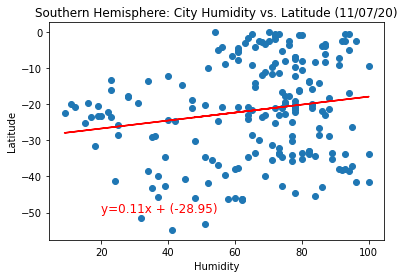

In [51]:
# Retrieve the humidity for northern hemisphere
South_city_data.head()
South_humidity = South_city_data.iloc[:,3]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of humidity vs. Latitude
SHL_slope, SHL_int, SHL_r, SHL_p, SHL_std_err = linregress(South_humidity, South_lat)
SHL_fit = SHL_slope * South_humidity + SHL_int
print(SHL_fit)

# Print the regression equation
SouthHL_equation =  f"y={round(SHL_slope, 2)}x + ({round(SHL_int,2)})"
print(SouthHL_equation)

# Compute and print the correlation 
print(f" Correlation =  {round((SHL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_humidity, SHL_fit, color="red")
plt.annotate(SouthHL_equation,(20,-50), fontsize=12, color ="red")
plt.scatter(South_humidity, South_lat)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: City Humidity vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure8.png")
plt.show()

#### What does the linear regression model? 
* The linear regression between humidity and latitude of cities in the northern hemisphere is used to predict the latitudes of the cities given their humidity.  
* There is a weak positive relationship between humidity and latitude. That is, an increase in the humidity causes a slight increase in the latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      40.177456
1      41.635180
2      41.171359
3      41.833961
4      35.207943
         ...    
574    38.388432
575    40.177456
577    41.833961
578    35.472984
579    41.833961
Name: Cloudiness, Length: 382, dtype: float64
y=0.07x + 35.21
 Correlation = 0.13


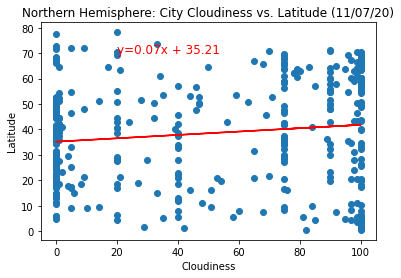

In [52]:
# Retrieve the cloudiness and Latitude for northern hemisphere
North_city_data.head()
North_cloud = North_city_data.iloc[:,8]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
NCL_slope, NCL_int, NCL_r, NCL_p, NCL_std_err = linregress(North_cloud, North_lat)
NCL_fit = NCL_slope * North_cloud + NCL_int
print(NCL_fit)

# Print the regression equation
NorthCL_equation =  f"y={round(NCL_slope, 2)}x + {round(NCL_int,2)}"
print(NorthCL_equation)

# Compute and print the correlation 
print(f" Correlation = {round((NCL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_cloud, NCL_fit, color="red")
plt.annotate(NorthCL_equation,(20,70), fontsize=12, color ="red")
plt.scatter(North_cloud, North_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: City Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure9.png")
plt.show()

#### What does the linear regression model? 
* The linear regression between cloudiness and latitude of cities in the northern hemisphere is used to predict the latitudes of the cities given their cloudiness.  
* There is a weak positive relationship between cloudiness and latitude. That is, an increase in the cloudiness causes a slight increase in the latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

6     -24.006739
7     -26.195734
8     -17.987000
9     -20.394896
13    -16.345253
         ...    
555   -25.648486
558   -23.459490
568   -22.583891
571   -17.987000
576   -26.195734
Name: Cloudiness, Length: 198, dtype: float64
y=0.11x + (-26.2)
 Correlation = 0.31


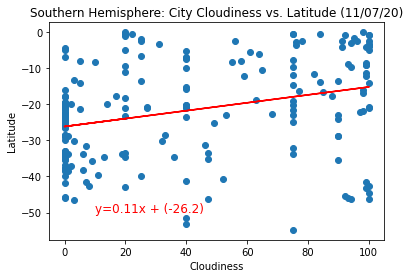

In [53]:
# Retrieve the cloudiness and Latitude for northern hemisphere
South_city_data.head()
South_cloud = South_city_data.iloc[:,8]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of cloudiness vs. Latitude
SCL_slope, SCL_int, SCL_r, SCL_p, SCL_std_err = linregress(South_cloud, South_lat)
SCL_fit = SCL_slope * South_cloud + SCL_int
print(SCL_fit)

# Print the regression equation
SouthCL_equation =  f"y={round(SCL_slope, 2)}x + ({round(SCL_int,2)})"
print(SouthCL_equation)

# Compute and print the correlation
print(f" Correlation = {round((SCL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.annotate(SouthCL_equation,(10,-50), fontsize=12, color ="red")
plt.plot(South_cloud, SCL_fit, color="red")
plt.scatter(South_cloud, South_lat)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: City Cloudiness vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure10.png")
plt.show()

#### What does the linear regression model? 
* The linear regression between cloudiness and latitude of cities in the southern hemisphere is used to predict the latitudes of the cities given their cloudiness.  
* There is a weak positive relationship between cloudiness and latitude. That is, an increase in the cloudiness causes a slight increase in the latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      37.013583
1      43.007041
2      38.890449
3      48.762763
4      35.011593
         ...    
574    36.225300
575    35.261842
577    34.736319
578    35.061643
579    42.018559
Name: WindSpeed, Length: 382, dtype: float64
y=1.25x + 33.76
 Correlation = 0.17


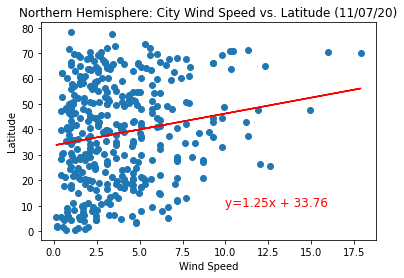

In [54]:
# Retrieve the wind speed and Latitude for northern hemisphere
North_city_data.head()
North_windspeed = North_city_data.iloc[:,7]
North_lat = North_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
NWL_slope, NWL_int, NWL_r, NWL_p, NWL_std_err = linregress(North_windspeed, North_lat)
NWL_fit = NWL_slope * North_windspeed + NWL_int
print(NWL_fit)

# Print the regression equation
NorthWL_equation =  f"y={round(NWL_slope, 2)}x + {round(NWL_int,2)}"
print(NorthWL_equation)

# Compute and print the correlation 
print(f" Correlation = {round((NWL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(North_windspeed, NWL_fit, color="red")
plt.annotate(NorthWL_equation,(10,10), fontsize=12, color ="red")
plt.scatter(North_windspeed, North_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: City Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure11.png")
plt.show() 

#### What does the linear regression model? 
* The linear regression between the wind speed and latitude of cities in the northern hemisphere is used to predict the latitudes of the cities given their wind speed.  
* There is a weak positive relationship between wind speed and latitude. That is, an increase in the wind speed causes a slight increase in the latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

6     -20.773574
7     -24.690707
8     -26.322845
9     -26.279321
13    -22.405713
         ...    
555   -18.967341
558   -21.469954
568   -18.923818
571   -26.866891
576   -24.690707
Name: WindSpeed, Length: 198, dtype: float64
y=-1.09x + (-17.4)
 Correlation = -0.21


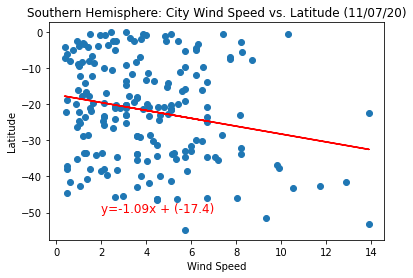

In [55]:
# Retrieve the wind speed and Latitude for southern hemisphere
South_city_data.head()
South_windspeed = South_city_data.iloc[:,7]
South_lat = South_city_data.iloc[:,6]

# Perform linear regression of wind speed vs. Latitude
SWL_slope, SWL_int, SWL_r, SWL_p, SWL_std_err = linregress(South_windspeed, South_lat)
SWL_fit = SWL_slope * South_windspeed + SWL_int
print(SWL_fit)

# Print the regression equation
SouthWL_equation =  f"y={round(SWL_slope, 2)}x + ({round(SWL_int,2)})"
print(SouthWL_equation)

# Compute and print the correlation 
print(f" Correlation = {round((SWL_r),2)}")

# Plot the graph of linear regression on the 
# scatter plots of MaxTemp vs. Latitude
# Include the axes labels, plot title, and date of analysis
plt.plot(South_windspeed, SWL_fit, color="red")
plt.annotate(SouthWL_equation,(2,-50), fontsize=12, color ="red")
plt.scatter(South_windspeed, South_lat)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: City Wind Speed vs. Latitude (%s)" % time.strftime("%x"))

# Save the plotted graph as .png
plt.savefig("../output_data/Figure12.png")
plt.show()

#### What does the linear regression model? 
* The linear regression between the wind speed and latitude of cities in the southern hemisphere is used to predict the latitudes of the cities given their wind speed.  
* There is a weak negative relationship between wind speed and latitude. That is, an increase in the wind speed causes a slight decrease in the latitude. 